In [1]:
import pandas as pd
import numpy as np

import scipy.sparse
import sklearn.feature_extraction

import matplotlib.pylab as plt
%matplotlib inline

from tqdm import tqdm
import platform

pd.set_option("display.max_rows", 10)
pd.set_option('display.max_columns', 1100)

import os

%pylab inline
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/home/levabd/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Another User Agent representation

### User Agent as tuple

#### From Udger 

`UserAgent = {ua_family_code, ua_version, ua_class_code, device_class_code, os_family_code, os_code}`

### Analise data

In [2]:
from lib.parsers.logParser import LogParser

l_parser = LogParser(log_folder='Logs/')

main_data, values_data, order_data = l_parser.parse_train_sample(0, 30, filter_crawlers=True, parse_ua=True)

100%|██████████| 30/30 [2:10:28<00:00, 277.81s/it]  


In [4]:
len(main_data)

610747

In [10]:
main_df = pd.DataFrame(main_data)

main_df

,device_class_code,ip,os_code,os_family_code,timestamp,ua_class_code,ua_family_code,ua_version
0,desktop,95.181.252.91,windows_7,windows,1485900038,browser,chrome,55.0.2883.87
1,smartphone,31.148.3.19,android_4_4,android,1485900079,mobile_browser,chrome_mobile,49.0.2623.105
2,desktop,188.162.183.66,windows_7,windows,1485900103,browser,firefox,51.0
3,desktop,37.144.52.103,windows_xp,windows,1485900105,browser,ie,8.0
4,desktop,91.201.178.51,windows_8_1,windows,1485900108,browser,opera,40.0.2308.81
...,...,...,...,...,...,...,...,...
610742,desktop,141.0.12.169,windows_98,windows,1488585377,browser,opera,12.16
610743,desktop,131.253.24.147,windows_7,windows,1488585395,browser,ie,9.0
610744,desktop,176.195.122.100,windows_7,windows,1488585447,browser,ie,8.0
610745,unrecognized,163.172.24.77,None,None,1488585501,crawler,googlebot,2.1


### Funny that row count on first 30 logs equal row count on first 10 logs without filtering

## !60% logs data was from crowlers!

In [11]:
list_device_class_code = main_df.device_class_code.value_counts().index.tolist()

list_device_class_code

['desktop',
 'smartphone',
 'unrecognized',
 'tablet',
 'smart_tv',
 'game_console',
 'pda',
 'wearable_computer']

In [17]:
list_os_family_code = main_df.os_family_code.value_counts().index.tolist()

print("Device platform family count: {}".format(len(list_os_family_code)))
list_os_family_code

Device platform family count: 34


['windows',
 'android',
 'ios',
 'linux',
 'osx',
 'jvm',
 'macos',
 'symbian_os',
 'nokia_x',
 'maemo',
 'mre',
 'mac_os',
 'chrome_os',
 'bsd',
 'blackberry_os',
 'solaris',
 'bada',
 'tizen',
 'fire_os',
 'nintendo_wii',
 'live_area',
 'amiga_os',
 'firefox_os',
 'beos',
 'os_2',
 'xrossmediabar',
 'rim_os',
 'risk_os',
 'hp_ux',
 'haiku_os',
 'irix',
 'syllable',
 'inferno_os',
 'palm_os']

In [14]:
list_os_code = main_df.os_code.value_counts().index.tolist()

print("Device platform count: {}".format(len(list_os_code)))
list_os_code

Device platform count: 104


['windows_7',
 'windows_xp',
 'windows_10',
 'android_4_4',
 'ios_10',
 'android_5_1',
 'windows_8_1',
 'android_6',
 'android_5_0',
 'android_4_2',
 'ios_9',
 'windows_8',
 'linux',
 'android_4_1',
 'windows_vista',
 'windows_98',
 'android',
 'windows',
 'linux_ubuntu',
 'jvm_microedition',
 'ios_7',
 'osx_10_10',
 'ios_8',
 'osx_10_11',
 'android_4_3',
 'android_2_3',
 'android_4',
 'macos_10_12',
 'osx_10_6',
 'windows_phone_8_1',
 'windows_2000_server',
 'windows_2000',
 'osx_10_9',
 'symbian_os',
 'osx',
 'osx_10_7',
 'android_7_0',
 'ios_5',
 'windows_phone_8',
 'nokia_x',
 'android_2_2',
 'jvm',
 'ios_6',
 'osx_10_8',
 'linux_debian',
 'windows_10_mobile',
 'windows_95',
 'osx_10_5',
 'maemo',
 'windows_nt',
 'android_7_1',
 'android_3',
 'windows_me',
 'mre',
 'mac_os',
 'windows_mobile',
 'chrome_os',
 'linux_fedora',
 'ios',
 'windows_phone_7',
 'linux_suse',
 'blackberry_os',
 'solaris',
 'bada',
 'osx_10_4',
 'linux_gentoo',
 'freebsd',
 'windows_rt',
 'ios_4',
 'openbsd',

In [18]:
list_ua_class_code = main_df.ua_class_code.value_counts().index.tolist()

print("Device browser class count: {}".format(len(list_ua_class_code)))
list_ua_class_code

Device browser class count: 11


['browser',
 'mobile_browser',
 'crawler',
 'unrecognized',
 'library',
 'email_client',
 'offline_browser',
 'validator',
 'multimedia_player',
 'feed_reader',
 'wap_browser']

In [19]:
list_ua_family_code = main_df.ua_family_code.value_counts().index.tolist()

print("Device browser family count: {}".format(len(list_ua_family_code)))
list_ua_family_code

Device browser family count: 255


['chrome',
 'firefox',
 'chrome_mobile',
 'yandex-browser',
 'ie',
 'opera',
 'safari_mobile',
 'android_browser',
 'googlebot',
 'spbot',
 'yandex-browser_mobile',
 'mobile_samsung_browser',
 'opera_mini',
 'google_app',
 'microsoft_edge',
 'amigo',
 'safari',
 'opera_mobile',
 'android_webview',
 'uc_browser_mobile',
 'ie_mobile',
 'siteexplorer',
 'sputnikbot',
 'mj12bot',
 'proximic',
 'miui_rowser',
 'iron',
 'yandexbot',
 'grapeshotcrawler',
 'netestate_crawler',
 'firefox_mobile',
 'seamonkey',
 'maxthon',
 'outlook_2007',
 'chromium',
 'netscape_navigator',
 'ccbot',
 'browsex',
 'aol_explorer',
 'android_httpurlconnection',
 'java',
 'microsoft_edge_mobile',
 'plukkie',
 'phantomjs',
 'apple_mail',
 'outlook_2010',
 'mozilla',
 'uc_browser',
 'yahoo',
 'avast_safezone',
 'chromodo',
 'facebook_app',
 'cliqzbot',
 'nokia_web_browser',
 'coast',
 'lunascape',
 'pale_moon',
 'megaindex',
 'genieo_web_filter',
 'uptimebot',
 'python-requests',
 'cm_browser',
 'flock',
 'iceweasel'

### As we see not all legal crawler was filtered. So we need new filter

In [5]:
list_ua_version = main_df.ua_version.value_counts().index.tolist()

print("Device browser version count: {}".format(len(list_ua_version)))
list_ua_version

Device browser version count: 3980


['chrome56.0.2924.87',
 'chrome_mobile55.0.2883.91',
 'firefox7.0.1',
 'firefox51.0',
 'safari_mobile10.0',
 'yandex-browser17.1.0.2034',
 'chrome55.0.2883.87',
 'chrome_mobile56.0.2924.87',
 'ie11.0',
 'ie6.0',
 'android_browser4.0',
 'chrome49.0.2623.112',
 'yandex-browser17.1.1.1003',
 'opera43.0.2442.806',
 'firefox43.0',
 'firefox38.0',
 'safari_mobile9.0',
 'ie10.0',
 'ie8.0',
 'opera42.0.2393.517',
 'yandex-browser17.1.1.1004',
 'ie9.0',
 'opera43.0.2442.991',
 'opera12.16',
 'chrome_mobile30.0.0.0',
 'microsoft_edge14.14393',
 'chrome_mobile54.0.2840.85',
 'android_webview',
 'chrome_mobile50.0.2661.89',
 'mobile_samsung_browser4.0',
 'opera36.0.2130.80',
 'ie7.0',
 'chrome_mobile52.0.2743.98',
 'chrome_mobile56.0.2924.79',
 'chrome_mobile51.0.2704.81',
 'safari_mobile7.0',
 'firefox47.0',
 'chrome_mobile53.0.2785.124',
 'firefox44.0',
 'firefox29.0',
 'chrome47.0.2526.111',
 'chrome48.0.2564.109',
 'chrome_mobile43.0.2357.93',
 'firefox40.1',
 'firefox50.0',
 'amigo54.0.2840.1

### As we see browser version must be merged with browser code

### Another data crowler filter

In [2]:
%%time

from lib.parsers.logParser import LogParser

l_parser = LogParser(log_folder='Logs/')

main_data, values_data, order_data = l_parser.parse_train_sample(0, 1, filter_crawlers=True, parse_ua=True)

print("Main data length: {}".format(len(main_data)))

main_df = pd.DataFrame(main_data)

main_df

100%|██████████| 1/1 [07:21<00:00, 441.43s/it]

Main data length: 20914
CPU times: user 6min, sys: 54 s, total: 6min 54s
Wall time: 7min 21s


In [3]:
list_ua_family_code = main_df.ua_family_code.value_counts().index.tolist()

print("Device browser family count: {}".format(len(list_ua_family_code)))
list_ua_family_code

Device browser family count: 65


['chrome',
 'firefox',
 'chrome_mobile',
 'yandex-browser',
 'ie',
 'safari_mobile',
 'opera',
 'android_browser',
 'yandex-browser_mobile',
 'mobile_samsung_browser',
 'opera_mini',
 'android_webview',
 'amigo',
 'safari',
 'microsoft_edge',
 'opera_mobile',
 'uc_browser_mobile',
 'java',
 'ie_mobile',
 'iron',
 'apple_mail',
 'miui_rowser',
 'seamonkey',
 'microsoft_edge_mobile',
 'firefox_mobile',
 'coast',
 'netscape_navigator',
 'maxthon',
 'cm_browser',
 'uc_browser',
 'nokia_web_browser',
 'browsex',
 'lunascape',
 'chromium',
 'chromodo',
 'sleipnir',
 'flock',
 'puffin',
 'arora',
 'crazy_browser',
 'mozilla',
 'pale_moon',
 'aol_explorer',
 'theworld_browser',
 'epiphany',
 'firefox_namoroka',
 'rambler_browser',
 'wyzo',
 'shiira',
 'kkman',
 'iceweasel',
 'avant_browser',
 'sitekiosk',
 'samsung_tv_browser',
 'swiftfox',
 'k-meleon',
 'sputnik_browser',
 'ps_vita_browser',
 'tt_explorer',
 'cyberfox',
 'stainless',
 'orca',
 'ncsa_mosaic',
 'omniweb',
 'dolphin']

In [ ]:
%%time

from lib.parsers.logParser import LogParser

l_parser = LogParser(log_folder='Logs/')

main_data, values_data, order_data = l_parser.parse_train_sample(0, 30, filter_crawlers=True, parse_ua=True)

print("Main data length: {}".format(len(main_data)))

 70%|███████   | 21/30 [2:27:13<58:20, 389.00s/it]  

In [9]:
main_df = pd.DataFrame(main_data)

main_df

list_device_class_code = pd.DataFrame(main_data).device_class_code.value_counts().index.tolist()
list_os_family_code = pd.DataFrame(main_data).os_family_code.value_counts().index.tolist()
list_os_code = pd.DataFrame(main_data).os_code.value_counts().index.tolist()
list_ua_class_code = pd.DataFrame(main_data).ua_class_code.value_counts().index.tolist()
list_ua_family_code = pd.DataFrame(main_data).ua_family_code.value_counts().index.tolist()
list_ua_version = pd.DataFrame(main_data).ua_version.value_counts().index.tolist()

print("Device count: {}".format(len(list_device_class_code)))
print("Device platform family count: {}".format(len(list_os_family_code)))
print("Device platform count: {}".format(len(list_os_code)))
print("Device browser class count: {}".format(len(list_ua_class_code)))
print("Device browser family count: {}".format(len(list_ua_family_code)))
print("Device browser version count: {}".format(len(list_ua_version)))

Device count: 8
Device platform family count: 33
Device platform count: 103
Device browser class count: 10
Device browser family count: 157
Device browser version count: 3980


In [13]:
list_device_class_code

['desktop',
 'smartphone',
 'tablet',
 'unrecognized',
 'smart_tv',
 'game_console',
 'pda',
 'wearable_computer']

In [14]:
list_os_family_code

['windows',
 'android',
 'ios',
 'linux',
 'osx',
 'jvm',
 'macos',
 'symbian_os',
 'nokia_x',
 'maemo',
 'mre',
 'mac_os',
 'chrome_os',
 'bsd',
 'blackberry_os',
 'solaris',
 'bada',
 'tizen',
 'nintendo_wii',
 'live_area',
 'amiga_os',
 'fire_os',
 'firefox_os',
 'xrossmediabar',
 'rim_os',
 'beos',
 'os_2',
 'hp_ux',
 'risk_os',
 'haiku_os',
 'palm_os',
 'syllable',
 'inferno_os',
 'irix']

In [15]:
list_os_code

['windows_7',
 'windows_xp',
 'windows_10',
 'android_4_4',
 'android_5_1',
 'ios_10',
 'windows_8_1',
 'android_6',
 'android_5_0',
 'android_4_2',
 'ios_9',
 'windows_8',
 'linux',
 'android_4_1',
 'windows_vista',
 'windows_98',
 'android',
 'windows',
 'linux_ubuntu',
 'jvm_microedition',
 'osx_10_10',
 'ios_7',
 'ios_8',
 'osx_10_11',
 'android_2_3',
 'android_4_3',
 'android_4',
 'macos_10_12',
 'osx_10_6',
 'windows_phone_8_1',
 'windows_2000_server',
 'windows_2000',
 'osx_10_9',
 'symbian_os',
 'osx',
 'osx_10_7',
 'android_7_0',
 'ios_5',
 'windows_phone_8',
 'nokia_x',
 'android_2_2',
 'ios_6',
 'osx_10_8',
 'jvm',
 'linux_debian',
 'windows_10_mobile',
 'windows_95',
 'osx_10_5',
 'maemo',
 'windows_nt',
 'android_7_1',
 'android_3',
 'windows_me',
 'mre',
 'windows_mobile',
 'mac_os',
 'chrome_os',
 'linux_fedora',
 'ios',
 'windows_phone_7',
 'linux_suse',
 'blackberry_os',
 'solaris',
 'bada',
 'osx_10_4',
 'linux_gentoo',
 'freebsd',
 'windows_rt',
 'ios_4',
 'openbsd',

In [16]:
list_ua_class_code

['browser',
 'mobile_browser',
 'unrecognized',
 'email_client',
 'library',
 'multimedia_player',
 'validator',
 'feed_reader',
 'offline_browser',
 'wap_browser']

In [17]:
list_ua_family_code

['chrome',
 'firefox',
 'chrome_mobile',
 'yandex-browser',
 'ie',
 'opera',
 'safari_mobile',
 'android_browser',
 'yandex-browser_mobile',
 'mobile_samsung_browser',
 'opera_mini',
 'microsoft_edge',
 'amigo',
 'safari',
 'opera_mobile',
 'android_webview',
 'uc_browser_mobile',
 'ie_mobile',
 'miui_rowser',
 'iron',
 'firefox_mobile',
 'seamonkey',
 'maxthon',
 'outlook_2007',
 'chromium',
 'netscape_navigator',
 'browsex',
 'aol_explorer',
 'java',
 'microsoft_edge_mobile',
 'apple_mail',
 'outlook_2010',
 'mozilla',
 'uc_browser',
 'chromodo',
 'facebook_app',
 'nokia_web_browser',
 'coast',
 'lunascape',
 'pale_moon',
 'cm_browser',
 'flock',
 'iceweasel',
 'puffin',
 'sleipnir',
 'blackberry_browser',
 'kkman',
 'crazy_browser',
 'opera_neon',
 'vivaldi',
 'arora',
 'epiphany',
 'dolphin',
 'rambler_browser',
 'avant_browser',
 'rockmelt',
 'konqueror',
 'sputnik_browser',
 'firefox_minefield',
 'second_life_viewer',
 'omniweb',
 'coolnovo',
 'maxthon_mobile',
 'powermarks',
 't

In [6]:
print(type(main_data))
print(type(values_data))
print(type(order_data))

<class 'list'>
<class 'list'>
<class 'list'>


### Save data

In [7]:
np.save('df/main_data.npy', np.array(main_data))
print("Main_data saved with size(Bytes): {}".format(os.stat('df/main_data.npy').st_size))
np.save('df/values_data.npy', np.array(values_data))
print("Values_data saved with size(Bytes): {}".format(os.stat('df/values_data.npy').st_size))
np.save('df/order_data.npy', np.array(order_data))
print("Order_data saved with size(Bytes): {}".format(os.stat('df/order_data.npy').st_size))

Main_data saved with size(Bytes): 174135401
Values_data saved with size(Bytes): 493202751
Order_data saved with size(Bytes): 80283456


### Bot Data

In [28]:
from lib.parsers.logParser import LogParser

l_test_parser = LogParser(log_folder='Logs/')

main_bot_data, values_bot_data, order_bot_data = l_test_parser.parse_bot_sample(30, 60, 60, 90, filter_crawlers=True, parse_ua=True)

  0%|          | 0/30 [00:00<?, ?it/s]

Start parsing logs for distribution


  0%|          | 0/30 [00:00<?, ?it/s]

Start parsing logs for values


  0%|          | 83/683509 [00:00<13:48, 824.47it/s]

Bots Generation


100%|██████████| 683509/683509 [12:47<00:00, 890.45it/s]


### Save data

In [30]:
np.save('df/main_bot_data.npy', np.array(main_bot_data))
print("Main_bot_data saved with size(Bytes): {}".format(os.stat('df/main_bot_data.npy').st_size))
np.save('df/values_bot_data.npy', np.array(values_bot_data))
print("Values_bot_data saved with size(Bytes): {}".format(os.stat('df/values_bot_data.npy').st_size))
np.save('df/order_bot_data.npy', np.array(order_bot_data))
print("Order_bot_data saved with size(Bytes): {}".format(os.stat('df/order_bot_data.npy').st_size))

Main_bot_data saved with size(Bytes): 115773166
Values_bot_data saved with size(Bytes): 620766475
Order_bot_data saved with size(Bytes): 92914382


### Test human data

In [31]:
l_parser_tmp = LogParser(log_folder='Logs/')

main_test_data, values_test_data, order_test_data = l_parser_tmp.parse_train_sample(90, 120, filter_crawlers=True, parse_ua=True)

print("Main test data length: {}".format(len(main_test_data)))

100%|██████████| 30/30 [2:03:21<00:00, 215.55s/it]  

Main test data length: 322189


In [32]:
np.save('df/main_test_data.npy', np.array(main_test_data))
print("Main_test_data saved with size(Bytes): {}".format(os.stat('df/main_test_data.npy').st_size))
np.save('df/values_test_data.npy', np.array(values_test_data))
print("Values_test_data saved with size(Bytes): {}".format(os.stat('df/values_test_data.npy').st_size))
np.save('df/order_test_data.npy', np.array(order_test_data))
print("Order_test_data saved with size(Bytes): {}".format(os.stat('df/order_test_data.npy').st_size))

Main_test_data saved with size(Bytes): 95012203
Values_test_data saved with size(Bytes): 267203762
Order_test_data saved with size(Bytes): 41513978


In [34]:
print("Main bot test data length: {}".format(len(main_bot_data)))

Main bot test data length: 683509


### Load data (if needed)

In [15]:
main_data = np.load('df/main_data.npy').tolist()
values_data = np.load('df/values_data.npy').tolist()
order_data = np.load('df/order_data.npy').tolist()

main_df = pd.DataFrame(main_data)

main_df

list_device_class_code = pd.DataFrame(main_data).device_class_code.value_counts().index.tolist()
list_os_family_code = pd.DataFrame(main_data).os_family_code.value_counts().index.tolist()
list_os_code = pd.DataFrame(main_data).os_code.value_counts().index.tolist()
list_ua_class_code = pd.DataFrame(main_data).ua_class_code.value_counts().index.tolist()
list_ua_family_code = pd.DataFrame(main_data).ua_family_code.value_counts().index.tolist()
list_ua_version = pd.DataFrame(main_data).ua_version.value_counts().index.tolist()

print("Device count: {}".format(len(list_device_class_code)))
print("Device platform family count: {}".format(len(list_os_family_code)))
print("Device platform count: {}".format(len(list_os_code)))
print("Device browser class count: {}".format(len(list_ua_class_code)))
print("Device browser family count: {}".format(len(list_ua_family_code)))
print("Device browser version count: {}".format(len(list_ua_version)))

Device count: 8
Device platform family count: 33
Device platform count: 103
Device browser class count: 10
Device browser family count: 157
Device browser version count: 3980


In [5]:
main_bot_data = np.load('df/main_bot_data.npy').tolist()
values_bot_data = np.load('df/values_bot_data.npy').tolist()
order_bot_data = np.load('df/order_bot_data.npy').tolist()

list_device_class_code = pd.DataFrame(main_bot_data)[1].value_counts().index.tolist()
list_os_family_code = pd.DataFrame(main_bot_data)[4].value_counts().index.tolist()
list_os_code = pd.DataFrame(main_bot_data)[3].value_counts().index.tolist()
list_ua_class_code = pd.DataFrame(main_bot_data)[6].value_counts().index.tolist()
list_ua_family_code = pd.DataFrame(main_bot_data)[7].value_counts().index.tolist()
list_ua_version = pd.DataFrame(main_bot_data)[8].value_counts().index.tolist()

print("Device count: {}".format(len(list_device_class_code)))
print("Device platform family count: {}".format(len(list_os_family_code)))
print("Device platform count: {}".format(len(list_os_code)))
print("Device browser class count: {}".format(len(list_ua_class_code)))
print("Device browser family count: {}".format(len(list_ua_family_code)))
print("Device browser version count: {}".format(len(list_ua_version)))

Device count: 7
Device platform family count: 33
Device platform count: 103
Device browser class count: 9
Device browser family count: 166
Device browser version count: 4202


In [11]:
main_test_data = np.load('df/main_test_data.npy').tolist()
values_test_data = np.load('df/values_test_data.npy').tolist()
order_test_data = np.load('df/order_test_data.npy').tolist()

list_device_class_code = pd.DataFrame(main_test_data).device_class_code.value_counts().index.tolist()
list_os_family_code = pd.DataFrame(main_test_data).os_family_code.value_counts().index.tolist()
list_os_code = pd.DataFrame(main_test_data).os_code.value_counts().index.tolist()
list_ua_class_code = pd.DataFrame(main_test_data).ua_class_code.value_counts().index.tolist()
list_ua_family_code = pd.DataFrame(main_test_data).ua_family_code.value_counts().index.tolist()
list_ua_version = pd.DataFrame(main_test_data).ua_version.value_counts().index.tolist()

print("Device count: {}".format(len(list_device_class_code)))
print("Device platform family count: {}".format(len(list_os_family_code)))
print("Device platform count: {}".format(len(list_os_code)))
print("Device browser class count: {}".format(len(list_ua_class_code)))
print("Device browser family count: {}".format(len(list_ua_family_code)))
print("Device browser version count: {}".format(len(list_ua_version)))

Device count: 6
Device platform family count: 27
Device platform count: 94
Device browser class count: 6
Device browser family count: 145
Device browser version count: 3172


### Train Part

In [16]:
important_orders_keys_set = {
    'Upgrade-Insecure-Requests',
    'Accept', 
    'If-Modified-Since',
    'Host', 
    'Connection', 
    'User-Agent', 
    'From', 
    'Accept-Encoding' 
}

important_values_keys_set = {
    'Accept', 
    'Accept-Charset', 
    'Accept-Encoding'
}

In [17]:
from lib.parsers.logParser import LogParser

orders_vectorizer = sklearn.feature_extraction.DictVectorizer(sparse=True, dtype=float)
values_vectorizer = sklearn.feature_extraction.DictVectorizer(sparse=True, dtype=float)

l_parser = LogParser(log_folder='Logs/')
l_parser.reassign_orders_values(order_data, values_data)

full_sparce_dummy = l_parser.prepare_data(orders_vectorizer, values_vectorizer, important_orders_keys_set, important_values_keys_set, fit_dict=True)

 11%|█▏        | 64767/571145 [00:00<00:00, 647665.99it/s]

Sparse dummy orders shape: 
(571145, 50)


100%|██████████| 571145/571145 [00:00<00:00, 707579.31it/s]


Sparse dummy values shape: 
(571145, 516)


In [18]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer(sparse_output=True)

list_device_class_code = main_df.device_class_code.value_counts().index.tolist()
list_device_class_code.append('NaN')
lb.fit(list_device_class_code)

y_device_class = lb.transform(main_df.device_class_code.fillna('NaN'))
y_device_class.shape

(571145, 9)

In [19]:
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score, train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, make_scorer
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(full_sparce_dummy, y_device_class, test_size=0.33, random_state=42)

In [20]:
%%time
clf = OneVsRestClassifier(LogisticRegression(random_state=42, C=100))
clf.fit(X_train, y_train)

CPU times: user 1min 50s, sys: 56 ms, total: 1min 51s
Wall time: 1min 51s


In [24]:
from lib.thresholdPredictions import ThresholdPredictions

pred = ThresholdPredictions(user_agent_list=lb.classes_.tolist(), clf=clf)
y_test_names, y_predicted, compare_answers, answers_count = pred.predict(X_test, y_test, 0.13, sparce_y=True)

188478it [00:04, 37726.31it/s]


In [25]:
compare_frame = pd.concat(
    [
        y_test_names,
        y_predicted, 
        pd.DataFrame(compare_answers), 
        pd.DataFrame(answers_count)
    ], keys=['test', 'predicted', 'correctness', 'count'], axis=1, join='inner')

#print('Headers: ' + str(' '.join(important_keys)))
print('sparse_dummy_values.shape: ' + str(full_sparce_dummy.shape))
print("Answers Count (Average) = {0}".format(np.average(answers_count)))
smart_accuracy = numpy.sum(compare_answers) / y_test.shape[0]
print("True Positive = {0}".format(smart_accuracy))
compare_frame

sparse_dummy_values.shape: (571145, 566)
Answers Count (Average) = 1.582847865533378
True Positive = 0.954557030528762


,test,predicted,correctness,count
,0,0,0,0
0,smartphone,[smartphone],True,1
1,desktop,[desktop],True,1
2,smartphone,"[desktop, smartphone]",True,2
3,smartphone,"[desktop, smartphone]",True,2
4,desktop,[desktop],True,1
...,...,...,...,...
188473,desktop,[desktop],True,1
188474,desktop,[desktop],True,1
188475,smartphone,"[smartphone, tablet]",True,2


In [26]:
pd.DataFrame(main_data).device_class_code

0            desktop
1         smartphone
2            desktop
3            desktop
4            desktop
             ...    
571140    smartphone
571141       desktop
571142       desktop
571143       desktop
571144       desktop
Name: device_class_code, Length: 571145, dtype: object

In [27]:
y_device_class[0].toarray()

array([[0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [10]:
list_device_class_code

['desktop',
 'smartphone',
 'tablet',
 'unrecognized',
 'smart_tv',
 'game_console',
 'pda',
 'wearable_computer',
 'NaN']

In [14]:
lb.classes_.tolist()

['NaN',
 'desktop',
 'game_console',
 'pda',
 'smart_tv',
 'smartphone',
 'tablet',
 'unrecognized',
 'wearable_computer']

## Load all data to full lists

In [ ]:
from lib.parsers.logParser import LogParser

l_parser = LogParser(log_folder='Logs/')

main_data, _, _ = l_parser.parse_train_sample(0, 128, filter_crawlers=True, parse_ua=True)

 54%|█████▍    | 68/126 [6:29:27<4:14:41, 263.48s/it] 

In [28]:
len(main_data)

1634500

In [15]:
main_df = pd.DataFrame(main_data)

main_df

list_device_class_code = main_df.device_class_code.value_counts().index.tolist()
list_os_family_code = main_df.os_family_code.value_counts().index.tolist()
list_os_code = main_df.os_code.value_counts().index.tolist()
list_ua_class_code = main_df.ua_class_code.value_counts().index.tolist()
list_ua_family_code = main_df.ua_family_code.value_counts().index.tolist()
list_ua_version = main_df.ua_version.value_counts().index.tolist()

print("Device count: {}".format(len(list_device_class_code)))
print("Device platform family count: {}".format(len(list_os_family_code)))
print("Device platform count: {}".format(len(list_os_code)))
print("Device browser class count: {}".format(len(list_ua_class_code)))
print("Device browser family count: {}".format(len(list_ua_family_code)))
print("Device browser version count: {}".format(len(list_ua_version)))

Device count: 8
Device platform family count: 37
Device platform count: 109
Device browser class count: 10
Device browser family count: 193
Device browser version count: 5790


desktop              1112408
smartphone            385174
tablet                 61307
unrecognized           23285
smart_tv                 543
game_console              77
pda                        3
wearable_computer          1
Name: device_class_code, dtype: int64

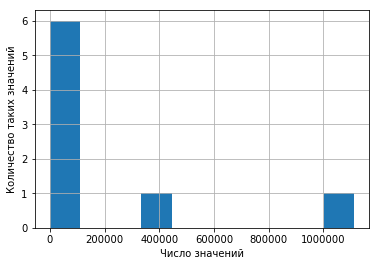

In [23]:
main_df.device_class_code.value_counts().hist()
plt.xlabel('Число значений')
plt.ylabel('Количество таких значений')
main_df.device_class_code.value_counts()

windows       1064126
android        316353
ios            108245
jvm             30563
osx             25403
               ...   
inferno_os          1
syllable            1
web_os              1
nintendo            1
hp_ux               1
Name: os_family_code, Length: 37, dtype: int64

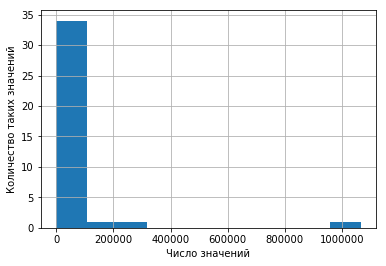

In [22]:
main_df.os_family_code.value_counts().hist()
plt.xlabel('Число значений')
plt.ylabel('Количество таких значений')
main_df.os_family_code.value_counts()

windows_7      539773
windows_xp     220819
windows_10     160205
windows_8_1     79378
android_4_4     78617
                ...  
inferno_os          1
web_os              1
android_1_6         1
syllable            1
hp_ux               1
Name: os_code, Length: 109, dtype: int64

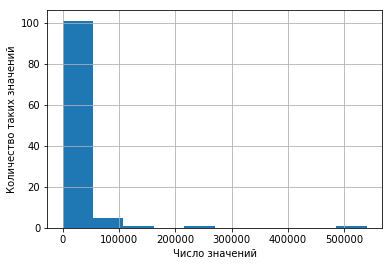

In [24]:
main_df.os_code.value_counts().hist()
plt.xlabel('Число значений')
plt.ylabel('Количество таких значений')
main_df.os_code.value_counts()

browser              1112571
mobile_browser        445039
library                22995
email_client            1675
unrecognized             419
multimedia_player         43
validator                 33
offline_browser           17
feed_reader                5
wap_browser                1
Name: ua_class_code, dtype: int64

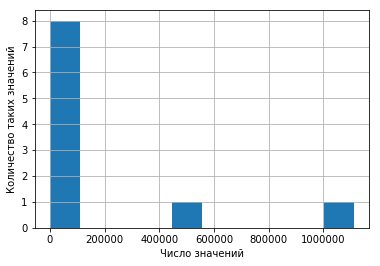

In [25]:
main_df.ua_class_code.value_counts().hist()
plt.xlabel('Число значений')
plt.ylabel('Количество таких значений')
main_df.ua_class_code.value_counts()

chrome            363808
firefox           273524
chrome_mobile     220982
yandex-browser    162732
ie                137031
                   ...  
wosbrowser             1
sundance               1
ibrowse                1
abrowse                1
winwap                 1
Name: ua_family_code, Length: 193, dtype: int64

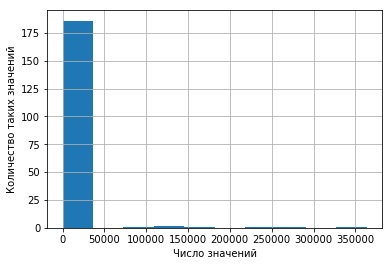

In [26]:
main_df.ua_family_code.value_counts().hist()
plt.xlabel('Число значений')
plt.ylabel('Количество таких значений')
main_df.ua_family_code.value_counts()

In [29]:
main_df.ua_family_code.value_counts()[main_df.ua_family_code.value_counts() > 100]

chrome              363808
firefox             273524
chrome_mobile       220982
yandex-browser      162732
ie                  137031
                     ...  
arora                  159
epiphany               159
rambler_browser        156
deepnet_explorer       115
konqueror              113
Name: ua_family_code, Length: 62, dtype: int64

chrome56.0.2924.87           119069
firefox7.0.1                  76257
safari_mobile10.0             63563
yandex-browser17.3.1.840      51358
chrome_mobile55.0.2883.91     49042
                              ...  
opera22.0.1485.81203              1
chrome54.0.2824.0                 1
chrome52.0.2767.81                1
uc_browser5.6.13108.1008          1
chrome22.0.345.606                1
Name: ua_version, Length: 5790, dtype: int64

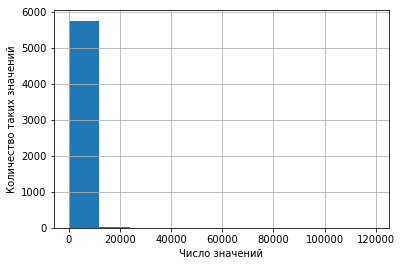

In [30]:
main_df.ua_version.value_counts().hist()
plt.xlabel('Число значений')
plt.ylabel('Количество таких значений')
main_df.ua_version.value_counts()

In [31]:
main_df.ua_family_code.value_counts()[main_df.ua_family_code.value_counts() > 100]

chrome              363808
firefox             273524
chrome_mobile       220982
yandex-browser      162732
ie                  137031
                     ...  
arora                  159
epiphany               159
rambler_browser        156
deepnet_explorer       115
konqueror              113
Name: ua_family_code, Length: 62, dtype: int64

### 62 from 5790 Browsers in TOP

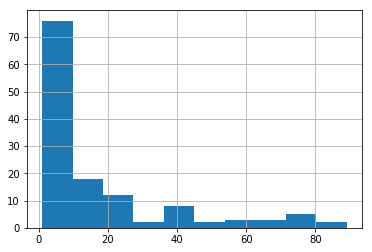

In [32]:
main_df.ua_family_code.value_counts()[main_df.ua_family_code.value_counts() < 100].hist()

In [33]:
main_df.ua_family_code.value_counts()[main_df.ua_family_code.value_counts() > 10]

chrome                    363808
firefox                   273524
chrome_mobile             220982
yandex-browser            162732
ie                        137031
                           ...  
kindle_browser                11
guzzle                        11
weltweitimnetz_browser        11
wkhtmltopdf                   11
browzar                       11
Name: ua_family_code, Length: 117, dtype: int64

### Only 117 browsers met over 10 times

So we can safely assume that the error from the new unpopular browsers is minimal

In [36]:
with open("df/group_labels/list_ua_version.txt", 'w') as f:
    for s in list_ua_version:
        f.write(s + '\n')

with open("df/group_labels/list_ua_family_code.txt", 'w') as f:
    for s in list_ua_family_code:
        f.write(s + '\n')

with open("df/group_labels/list_ua_class_code.txt", 'w') as f:
    for s in list_ua_class_code:
        f.write(s + '\n')
        
with open("df/group_labels/list_os_code.txt", 'w') as f:
    for s in list_os_code:
        f.write(s + '\n')

with open("df/group_labels/list_os_family_code.txt", 'w') as f:
    for s in list_os_family_code:
        f.write(s + '\n')

with open("df/group_labels/list_device_class_code.txt", 'w') as f:
    for s in list_device_class_code:
        f.write(s + '\n')

### Test Bot Data and other samples set

In [5]:
from lib.parsers.logParser import LogParser

l_parser = LogParser(log_folder='Logs/')

main2_data, values2_data, order2_data = l_parser.parse_train_sample(30, 40, filter_crawlers=True, parse_ua=True)

np.save('df/main2_data.npy', np.array(main2_data))
print("Main2_data saved with size(Bytes): {}".format(os.stat('df/main2_data.npy').st_size))
np.save('df/values2_data.npy', np.array(values2_data))
print("Values2_data saved with size(Bytes): {}".format(os.stat('df/values2_data.npy').st_size))
np.save('df/order2_data.npy', np.array(order2_data))
print("Order2_data saved with size(Bytes): {}".format(os.stat('df/order2_data.npy').st_size))

Main2_data saved with size(Bytes): 46100951
Values2_data saved with size(Bytes): 133747688
Order2_data saved with size(Bytes): 21316262


In [5]:
from lib.parsers.logParser import LogParser

l_parser = LogParser(log_folder='Logs/')

main2_bot_data, values2_bot_data, order2_bot_data = l_parser.parse_bot_sample(50, 60, 40, 50, filter_crawlers=True, parse_ua=True)

np.save('df/main2_bot_data.npy', np.array(main2_bot_data))
print("Main2_bot_test_data saved with size(Bytes): {}".format(os.stat('df/main2_bot_data.npy').st_size))
np.save('df/values2_bot_data.npy', np.array(values2_bot_data))
print("Values2_bot_data saved with size(Bytes): {}".format(os.stat('df/values2_bot_data.npy').st_size))
np.save('df/order2_bot_data.npy', np.array(order2_bot_data))
print("Order2_bot_data saved with size(Bytes): {}".format(os.stat('df/order2_bot_data.npy').st_size))

Main2_bot_test_data saved with size(Bytes): 34687220
Values2_bot_data saved with size(Bytes): 182712696
Order2_bot_data saved with size(Bytes): 27279318
